In [28]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

aspect_ratio = 16./9.
figsize=6.
BoiseState_blue = '#0033A0'
BoiseState_orange = '#D64309'

In [62]:
filename = "WAVEGP2_2020Feb23.CSV"

data = np.genfromtxt(filename, delimiter=",", names=['year', 'month', 'day', 'hour', 'min', 'sec', 
                                                     'dust', 'pres', 'temp'])

time0 = data['hour'][0]*3600. + data['min'][0]*60. + data['sec'][0]
time = data['hour']*3600. + data['min']*60. + data['sec']
delta_time = time - time0
dust = data['dust']
pres = data['pres']

pres0 = 1013.25 # hPa
altitude = 44330.*(1. - (pres/pres0)**(1./5.255))

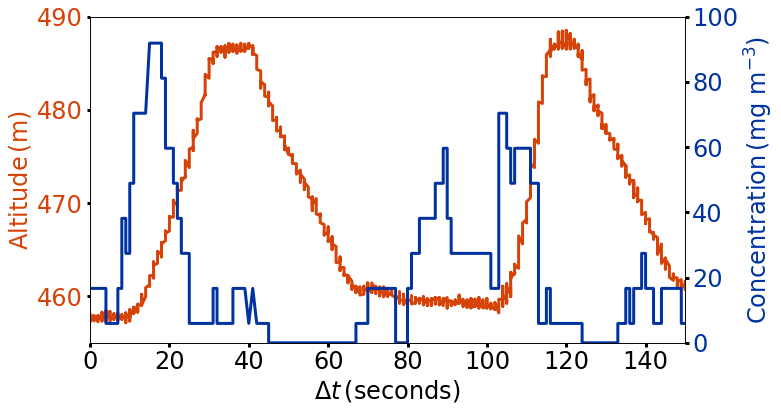

In [73]:
min_time = 2350
max_time = 2500 - min_time

fig = plt.figure(figsize=(figsize*aspect_ratio, figsize))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

ax2.plot(delta_time - min_time, dust, color=BoiseState_blue, lw=3)
ax1.plot(delta_time - min_time, altitude, color=BoiseState_orange, lw=3)
ax1.set_xlabel("$\\Delta t\,({\\rm seconds})$", fontsize=24)
ax2.set_ylabel("Concentration$\,({\\rm mg\ m^{-3}})$", fontsize=24, color=BoiseState_blue)

ax1.set_ylabel("Altitude$\,({\\rm m})$", fontsize=24, color=BoiseState_orange)

ax1.tick_params(labelsize=24)
ax2.tick_params(labelsize=24)
ax2.tick_params(axis='y', labelcolor=BoiseState_blue)
ax1.tick_params(axis='y', labelcolor=BoiseState_orange)

ax1.set_xlim([0, max_time])
ax2.set_ylim([0, 100])
ax1.set_ylim([455, 490])

fig.savefig("drone-altitude_dust-concentration.png", dpi=500, bbox_inches='tight')